# Time Series Forecasting with ARIMA Models Part 2

Time series data is one of the most common data types in the industry and you will probably be working with it in your career. Therefore understanding how to work with it and how to apply analytical and forecasting techniques are critical for every aspiring data scientist. In this series of articles, I will go through the basic techniques to work with time-series data, starting from data manipulation, analysis, and visualization to understand your data and prepare it for and then using the statistical, machine, and deep learning techniques for forecasting and classification. It will be more of a practical guide in which I will be applying each discussed and explained concept to real data.

This article is the second part of time series forecasting using ARIMA models. In the [first part](https://www.kaggle.com/code/youssef19/time-series-forecasting-with-arima-models-part-1), the ARIMA model was introduced and how to use to forecast the future. In this article, I will focus more on choosing the best model parameter and how to build a pipeline for the process of forecasting through the Box-Jenkins method.

# Table of contents:

1. Finding the Best ARIMA Models

    1.1. Using ACF and PACF to find the best model parameters

    1.2. Using AIC and BIC to narrow your model choices

    1.3. The model diagnostic a

    1.4. The Box-Jenkins method
2. Seasonal ARIMA Models

    2.1. Introduction to seasonal time series
    
    2.2. Seasonal ARIMA model
    
    2.3. Process automation and model saving
    
    2.4. SARIMA and Box-Jenkins for seasonal time series


# 1. Finding the Best ARIMA Models
In this section, we will learn how to identify promising model orders from the data itself, then, once the most promising models have been trained, you’ll learn how to choose the best model from this fitted selection. You’ll also learn how to structure your time series project using the Box-Jenkins method.

# 1.1. Using ACF and PACF to find the best model parameters
In the previous section, we knew how to use the ARIMA model for forecasting, however, we did not discuss how to choose the order of the forecasting model. The model order is a very important parameter that affects the quality of the forecasts. One of the best ways to identify the correct model order is the autocorrelation function (ACF) and partial autocorrelation function (PACF).

The ACF can be defined as the correlation between a time series and itself with n lags. So ACF(1) is the correlation between the time series and a one-step lagged version of itself. An ACF(2) is the correlation between the time series and a one-step lagged version of itself and so on. To have a better understanding of the ACF, let’s plot it for the earthquake time series for ten lags.



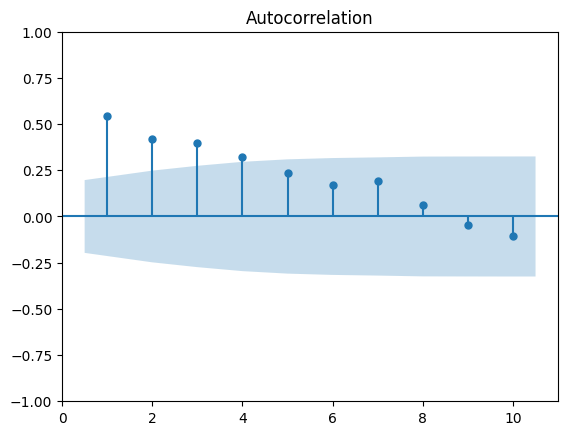

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
earthquake = pd.read_csv('/kaggle/input/earthquake/earthquakes (3).csv')
# Make ACF plot
plot_acf(earthquake['earthquakes_per_year'], lags=10, zero=False)
plt.show()


The bars in the figure above show the correlation of the time series with itself at each lag. If the bar is inside the blue shaded region, this means that it is not statistically significant.

On the other hand, the PACF is the correlation between a time series and a lagged version of itself after subtracting the effect of correlation at smaller lags. So it can be considered as the correlation at a particular lag. To have a better understanding of the PACF, let’s plot it for the earthquake time series for ten lags.


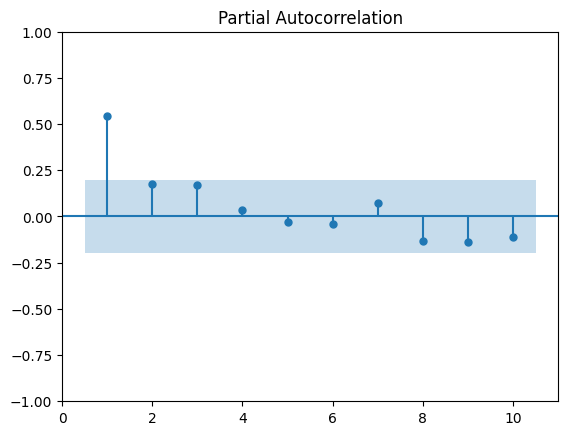

In [2]:
# Make PACF plot
plot_pacf(earthquake['earthquakes_per_year'], lags=10, zero=False)
plt.show()


The bars in the figure above show the correlation of the time series with itself at each lag after subtracting the effect of the correlation of the smaller lags. If the bar is inside the blue shaded region, this means that it is not statistically significant.

**The time series must be made stationary before making these plots. If the ACF values are high and tail off very very slowly, therefore this is a sign that the data is non-stationarity, and it needs to be different. On the other hand, if the autocorrelation at lag-1 is very negative this is a sign that we have taken the difference too many times.**

By comparing the ACF and PACF for a time series, we can indicate the model order. There are three main possibilities:

* AR(p) model: ACF tails off and PACF cuts off after lag p. The figure below shows the ACF and PACF plots for an AR(2).

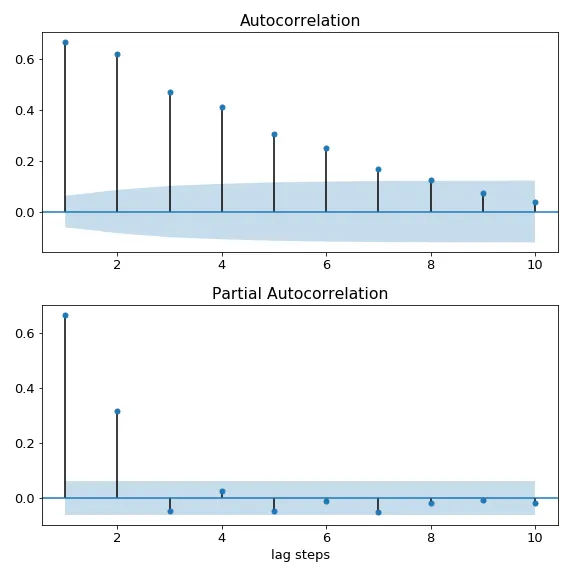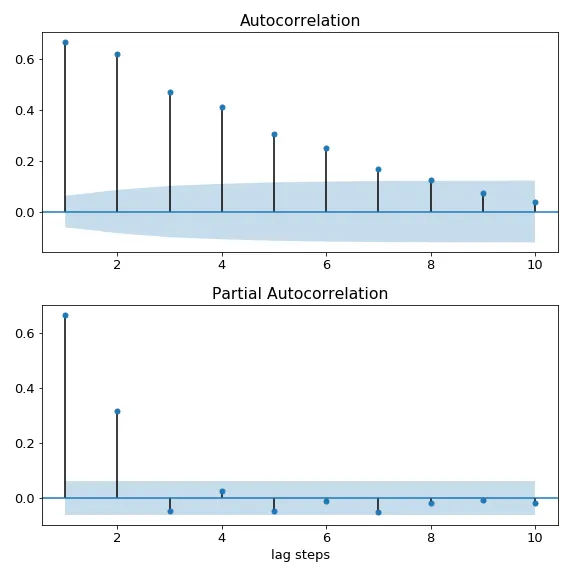


* MA(q) model: The amplitude of the ACF cuts off after lag q, while the PACF tails off. The figure below shows the ACF and PACF plots for an MA(2).

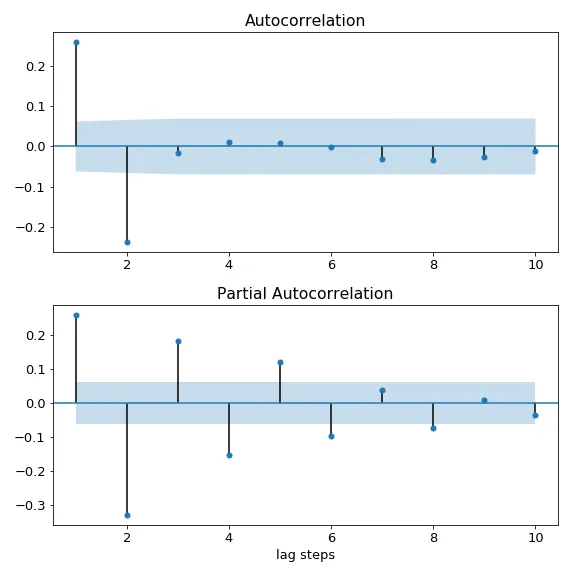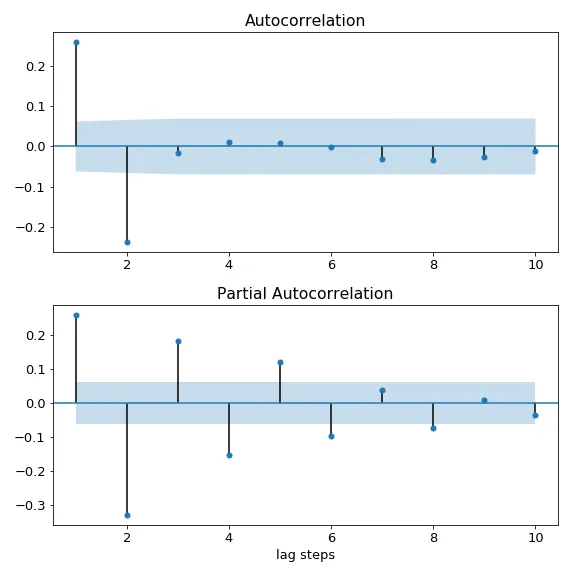


* ARIMA(p,q) model: if the amplitude of both the ACF and PACF cuts off, then this will be the ARIMA model, however, we will not be able to deduce the model orders (p,q) from the plot.

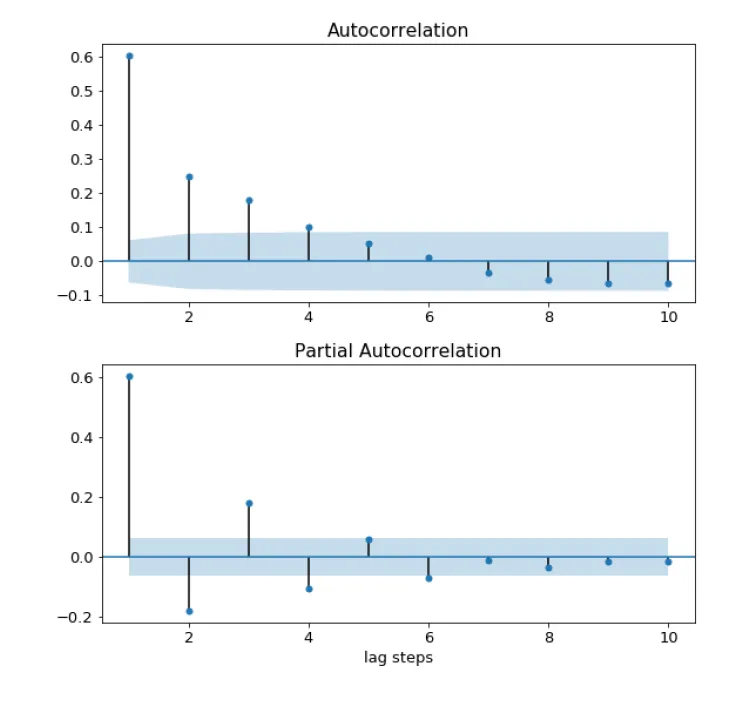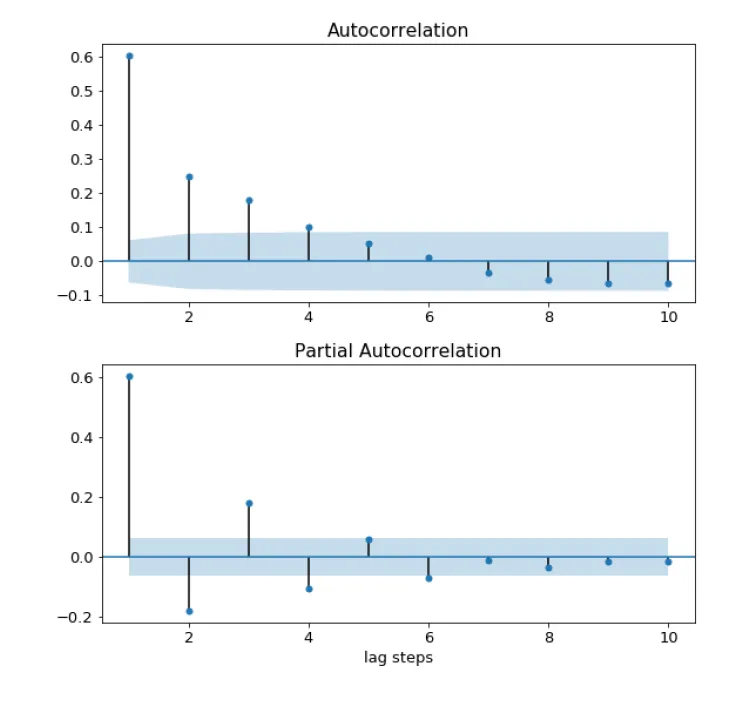


Let’s apply this to the earthquake time series, that we plotted the ACF and PACF before. It looks like the ACF tails off while the PACF cuts off at a lag of 1. Therefore it follows the first case, and the time series can be modeled using an AR(1) model.



# 1.2. Using AIC and BIC to narrow your model choices

We mentioned in the third case when the amplitude of both the ACF and PACF cuts off, the time series can be modeled using an ARIMA(p,q) model. However, the order of the model (p,q) can be indicated from the ACF and PACF plot. However, the Akaike information criterion (AIC) and Bayesian information criterion (BIC) can be used for finding their values.

For both AIC and BIC lower values suggest a better model. Both AIC and BIC penalize complex models with a lot of parameters. However, they differ in the way they do so and how much they penalize the model complexity. The BIC penalizes additional model orders more than AIC and therefore BIC will sometime suggest a simpler model than AIC. They often will suggest the same model, but if not, you will have to choose one of them depending on your priorities. If your goal is to identify a better predictive model then AIC will be a better choice, and if your goal is to identify a good explanatory model, then BIC will be a good choice.

Let’s apply this to the earthquake dataset used before and compare the results with the results we got from using ACF/PACF. We predict that the best model to fit the data is AR(1). We will calculate the AIC and BIC for different variations of p and q starting from 0 to 2.



In [3]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(earthquake['earthquakes_per_year'], order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))            
        except:
            print(p, q, None, None)
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47692D+00    |proj g|=  2.21156D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.212D-08   4.477D+00
  F =   4.4769180418808485     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.2

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28331D+00    |proj g|=  5.26363D-03

At iterate    5    f=  3.28311D+00    |proj g|=  2.65460D-03

At iterate   10    f=  3.28297D+00    |proj g|=  5.26498D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   4.110D-07   3.283D+00
  F =   3.2829715879527255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   25    f=  3.23658D+00    |proj g|=  7.37971D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   7.116D-06   3.237D+00
  F =   3.2365799999795208     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23501D+00    |proj g|=  2.49247D-02

At iterate    5    f=  3.23395D+00    |proj g|=  2.75655D-03

At iterate   10    f=  3.23389D+00    |proj g|=  4.51104D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  3.22821D+00    |proj g|=  9.38267D-03

At iterate   25    f=  3.22652D+00    |proj g|=  1.97595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   1.053D-05   3.227D+00
  F =   3.2265184057744687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Sorted by AIC 


   p  q         aic         bic
0  1  1  647.132300  654.917660
1  1  2  648.738566  659.119046
2  2  1  648.842840  659.223319
3  2  2  648.850644  661.826244
4  2  0  656.028374  663.813734
5  1  0  666.645526  671.835765
6  0  2  761.067479  768.852838
7  0  1  799.674173  804.8

The results show that the best model to fit the data is (1,1), which is different from what was found using the PACF/ACF.

# 3.3. The model diagnostic
The next step is to diagnose the model to know whether the model is behaving well or not. To diagnose the model we will focus on the residuals of the training data. The residuals are the difference between the model’s one-step-ahead predictions and the real values of the time series.

In statsmodels, the residuals over the training period can be accessed using the dot-resid attribute of the results object. The results are stored as a pandas series. This is shown in the code below:

In [4]:
# The model with the best p and q found from pervious step
model = sm.tsa.statespace.SARIMAX(earthquake['earthquakes_per_year'], order=(1, 0, 1))
# Fit model
results = model.fit()
# Assign residuals to variable
residuals = results.resid
print(residuals)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24438D+00    |proj g|=  6.79014D-02

At iterate    5    f=  3.23891D+00    |proj g|=  7.28400D-04

At iterate   10    f=  3.23870D+00    |proj g|=  1.18872D-02

At iterate   15    f=  3.23804D+00    |proj g|=  3.81184D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   8.732D-07   3.238D+00
  F =   3.2380419190271801     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
0     13

 This problem is unconstrained.


To know how far the predictions are from the true value, we can calculate the mean absolute error of the residuals. This is shown in the code below:



In [5]:
# The mean absolute error
import numpy as np
mae = np.mean(np.abs(residuals))
print(mae)


4.755625669941166


The ideal model should have residuals that are uncorrelated white Gaussian noise centered on zero. We can use the results object’s .plot_diagnostics method to generate four common plots for evaluating this. The code for this is shown below:

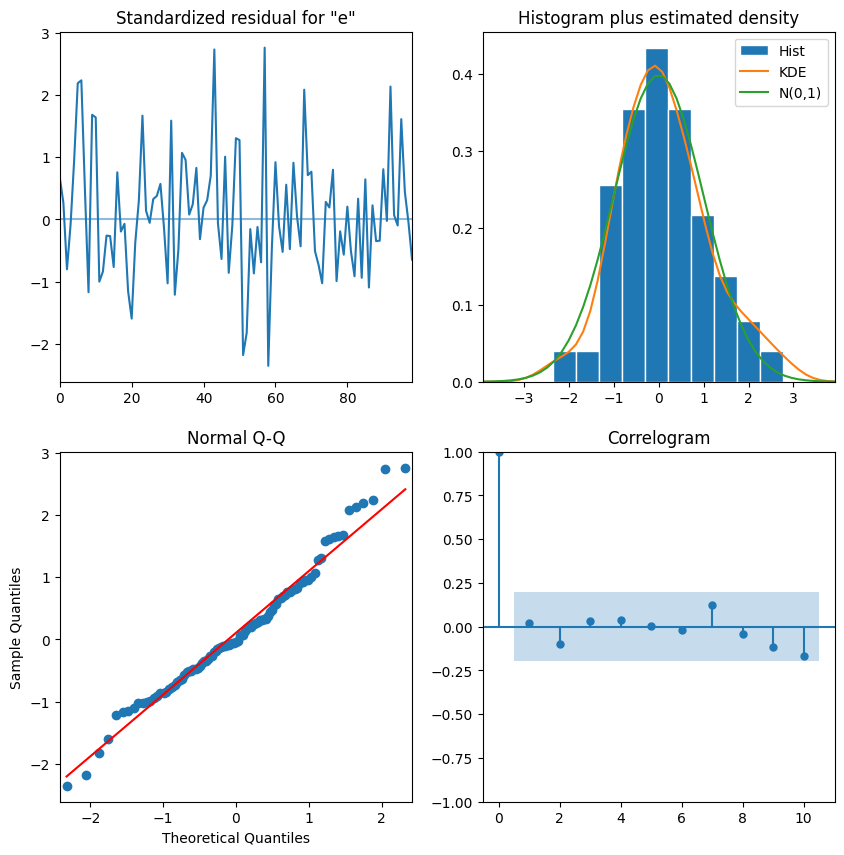

In [6]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(10,10))
plt.show()


There are four plots in the residuals diagnostic plots:

* **Standardized residuals plot**: The top left plot shows one-step-ahead standardized residuals. If our model is working correctly, there should be no obvious pattern in the residuals. This is shown here in this case.

* **Histogram plus estimated density plot**: This plot shows the distribution of the residuals. The histogram shows us the measured distribution; the orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing well.

* **Normal Q-Q plot**: The Q-Q plot compare the distribution of the residuals to the normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end.

* **Correlogram plot:** The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag greater than zero should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model.

We can get the summary statistics of the model residuals using the results **.summary** method. In the result table shown below, the Prob(Q) is the p-value associated with the null hypothesis that the residuals have no correlation structure. Prob(JB) is the p-value associated with the null hypothesis that the residuals are Gaussian normally distributed. If either of the p-values is less than 0.05 we reject that hypothesis.

In [7]:
# Summary statistics
print(results.summary())


                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -320.566
Date:                  Sat, 09 Sep 2023   AIC                            647.132
Time:                          11:40:23   BIC                            654.918
Sample:                               0   HQIC                           650.282
                                   - 99                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.014     70.282      0.000       0.962       1.017
ma.L1         -0.5517      0.089     -6.198      0.000      -0.726      -0.377
sigma2        37.0254      4.980    

The values of Prob(Q) and Prob(JB) are both more than 0.05, so we cannot reject the null hypothesis that the residuals are Gaussian normally distributed.

# 3.4. The Box-Jenkins method
The Box-Jenkins method is a checklist that helps you to go from raw data to a model ready for production. The three main steps in this method to follow to go from raw data to a production-ready model: are identification, estimation, model diagnostics, and decision making based on the model diagnostics. This could be summarized in the figure below.

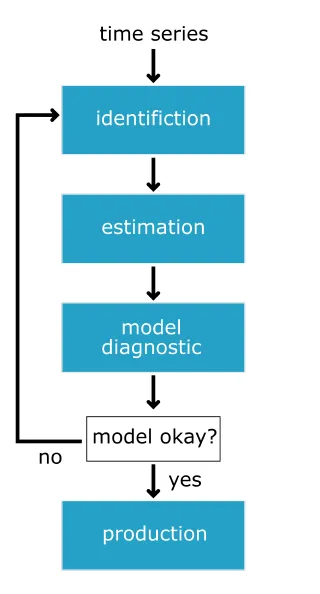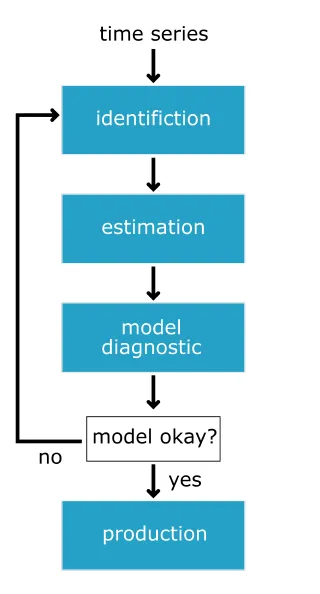

### Identification

In the identification step, we explore and characterize the data to find the appropriate form of the data so as to be used in the estimation step. First, we will investigate whether the data is stationary or not. If the data is not stationary, we will find which transformation will transfer the data into stationary, and finally, we will identify the order of p and q that are most promising.

The tools used in this step are plotting, augmented dicky-fuller test, differencing and other transformation such as log transformation, and ACF and PACF for identifying promising model orders.

### Estimation

In the estimation step the model is trained and the AR and MA coefficients of the data. This is automatically done for us by the model.fit method. In this step, we can fit many models and use BIC and AIC to narrow them down to more promising models.

### Model Diagnostics

Using the information gathered from statistical tests and plots during the diagnostic step, we need to make a decision. Is the model good enough or do we need to go back and rework it? if the residuals are not as they should be we will go back and rethink our choices in the previous two steps. If the residuals are okay then we can go ahead and make forecasts!

This should be your general project workflow when developing time series models. You may have to repeat the process a few times in order to build a model that fits well.

Let’s apply the Box-Jenkins method to new data. The data will be used is the co2 emission between 1958 to 2018. We will go through the three steps. We will start with **identification**. First, we will load and plot the data using the code below.

<Axes: xlabel='date'>

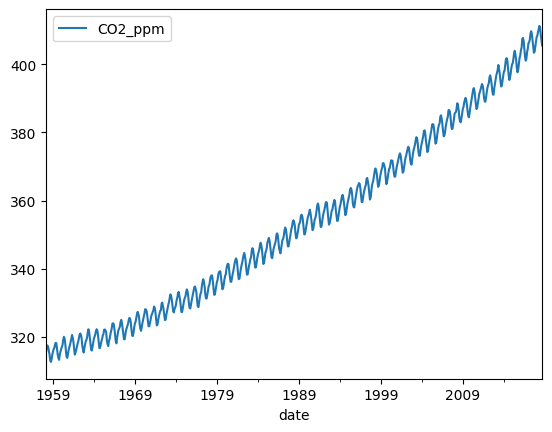

In [8]:

co2 = pd.read_csv('/kaggle/input/co2-data/co2.csv',
                     index_col='date',
                     parse_dates=True)
co2.plot()


It is obvious that there is a trend in the data. Then we will apply the augmented Dicky-Fuller test.

In [9]:
from statsmodels.tsa.stattools import adfuller

# Run Dicky-Fuller test
result = adfuller(co2)

# Print test statistic
print('The test stastics:', result[0])

# Print p-value
print("The p-value:",result[1])


The test stastics: 4.774866785205452
The p-value: 1.0


The p-value is 1 which means that we can not reject the null hypothesis that the time series is non-stationary. To convert it to stationery, let’s take the first difference and plot it and apply the augmented Dicky-Fuller test.


The test stastics: -5.287425631615307
The p-value: 5.813789175331279e-06


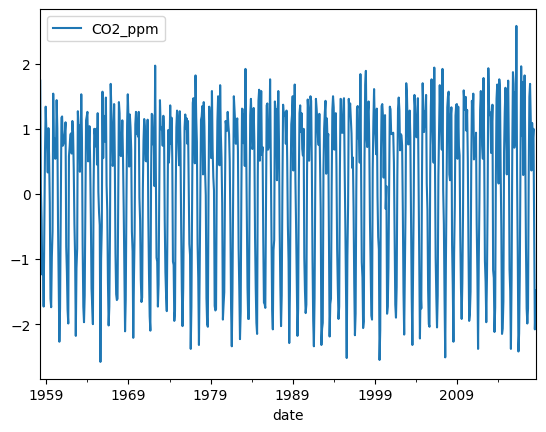

In [10]:
co2_diff = co2.diff()
co2_diff = co2_diff.dropna()
co2_diff.plot()

# Run Dicky-Fuller test
result_diff = adfuller(co2_diff)

# Print test statistic
print('The test stastics:', result_diff[0])

# Print p-value
print("The p-value:",result_diff[1])


The p-value is less than 0.05 so we can reject the null hypothesis and the data can be assumed that it is stationary. The first difference in the co2 data is shown in the figure above.

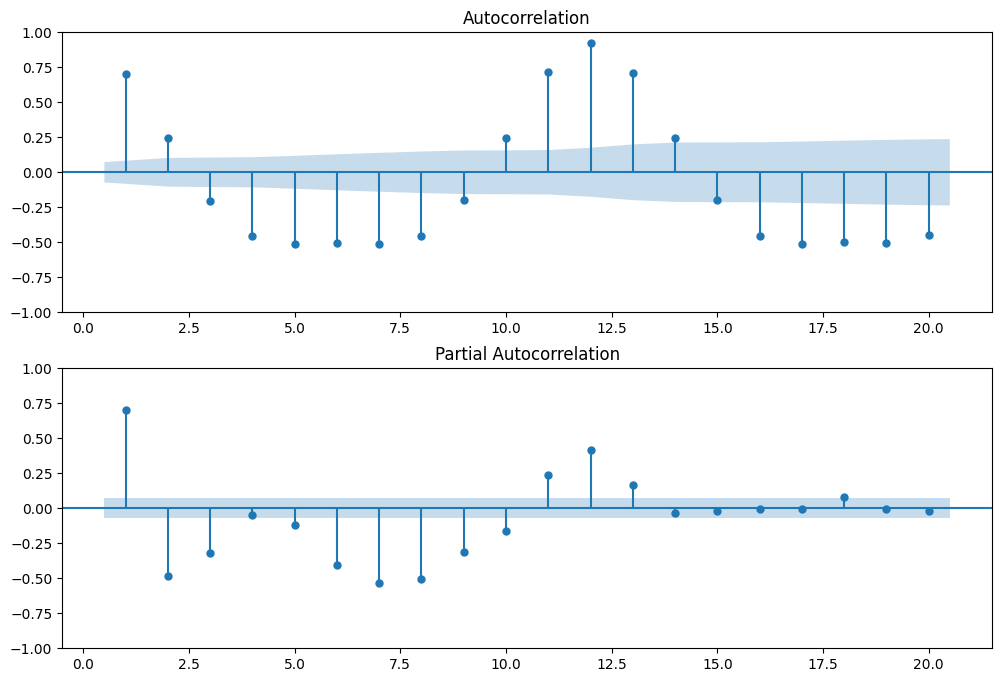

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(co2_diff, lags=20, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(co2_diff, lags=20, zero=False, ax=ax2)

plt.show()


The ACF and PACF plot does not follow a certain pattern. So it will be difficult to identify the model order. So instead we will use the AIC and BIC to narrow down the choice of the model order and then fit the data to the best model. This is the second step which is the estimation step.

In [12]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-4
for p in range(5):
    # Loop over q values from 0-4
    for q in range(5):
      
        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(co2, order=(p, 1, q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))            
        except:
            print(p, q, None, None)
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Models sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Models sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was pr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62713D+00    |proj g|=  1.10868D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.010D-06   1.627D+00
  F =   1.6271294104890168     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5

 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  1.20368D+00    |proj g|=  2.25639D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   8.496D-06   1.204D+00
  F =   1.2036762843766025     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31811D+00    |proj g|=  3.90113D-01


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.13706D+00    |proj g|=  3.75961D-02

At iterate   10    f=  1.13530D+00    |proj g|=  4.49429D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   4.494D-06   1.135D+00
  F =   1.1353033216816701     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34064D+00    |proj g|=  4.32380D-01

At iterate    5    f=  1.15184D+00    |proj g|=  1.27917D-01

At iterate   10    f=  1.13403D+00    |proj g|=  5.91304D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   1.684D-06   1.134D+00
  F =   1.1339861999734584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28366D+00    |proj g|=  1.54774D-03

At iterate    5    f=  1.28365D+00    |proj g|=  5.50901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      8      1     0     0   2.771D-06   1.284D+00
  F =   1.2836539650016319     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21669D+00    |proj g|=  1.62051D-01

At iterate    5    f=  1.16982D+00    |proj g|=  1.67014D-02

At iterate   10    f=  1.16903D+00    |proj g|=  6.18732D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   6.187D-06   1.169D+00
  F =   1.1690319746900077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06050D+00    |proj g|=  2.70917D+00

At iterate    5    f=  1.15573D+00    |proj g|=  1.17669D-01

At iterate   10    f=  1.13473D+00    |proj g|=  2.67116D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   2.116D-06   1.135D+00
  F =   1.1347196809298239     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30617D+00    |proj g|=  5.17267D-01

At iterate    5    f=  1.10245D+00    |proj g|=  5.04158D-02

At iterate   10    f=  1.08884D+00    |proj g|=  3.46235D-02

At iterate   15    f=  1.08822D+00    |proj g|=  4.17079D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   1.810D-06   1.088D+00
  F =   1.0882231947686225     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   4.607D-06   1.151D+00
  F =   1.1513897285102537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07068D+00    |proj g|=  1.07876D-01

At iterate    5    f=  1.04420D+00    |proj g|=  4.46821D-03

At iterate   10    f=  1.04415D+00    |proj g|=  1.66110D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10028D+00    |proj g|=  1.31302D-01

At iterate    5    f=  1.05045D+00    |proj g|=  3.83129D-02

At iterate   10    f=  1.04414D+00    |proj g|=  2.62261D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   1.891D-05   1.044D+00
  F =   1.0441298939541339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67493D+00    |proj g|=  2.60490D+00

At iterate    5    f=  1.16979D+00    |proj g|=  6.86125D-02

At iterate   10    f=  1.14154D+00    |proj g|=  2.24791D-02

At iterate   15    f=  1.11712D+00    |proj g|=  1.75500D-01

At iterate   20    f=  1.04392D+00    |proj g|=  3.09417D-02

At iterate   25    f=  1.04096D+00    |proj g|=  1.82581D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     41      1     0     0   

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63374D+00    |proj g|=  2.59837D+00

At iterate    5    f=  1.12599D+00    |proj g|=  3.70919D-02

At iterate   10    f=  9.93560D-01    |proj g|=  2.08250D-01

At iterate   15    f=  9.05429D-01    |proj g|=  4.60836D-02

At iterate   20    f=  8.88000D-01    |proj g|=  2.17657D-02

At iterate   25    f=  8.87709D-01    |proj g|=  5.41816D-04

At iterate   30    f=  8.87687D-01    |proj g|=  3.20352D-03

At iterate   35    f=  8.86087D-01    |proj g|=  3.98497D-02

At iterate   40    f=  8.82505D-01    |proj g|=  8.57497D-03

At iterate   45    f=  8.82435D-01    |proj g|=  3.88274D-04

At iterate   50    f=  8.82434D-01    |proj g|=  3.52697D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10144D+00    |proj g|=  1.98471D-03

At iterate    5    f=  1.10144D+00    |proj g|=  3.19032D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   1.905D-05   1.101D+00
  F =   1.1014355831653271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10915D+00    |proj g|=  3.28195D-02

At iterate    5    f=  1.10509D+00    |proj g|=  4.67507D-02

At iterate   10    f=  1.05178D+00    |proj g|=  5.10011D-02

At iterate   15    f=  1.04494D+00    |proj g|=  3.21715D-02

At iterate   20    f=  1.04413D+00    |proj g|=  3.30711D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   3.307D-05   1.044D+00
  F =   1.0441304430900136     

CONVERG

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  1.12609D+00    |proj g|=  4.55699D-02

At iterate   10    f=  1.04541D+00    |proj g|=  6.60770D-02

At iterate   15    f=  1.04381D+00    |proj g|=  2.31092D-03

At iterate   20    f=  1.04379D+00    |proj g|=  3.87245D-03

At iterate   25    f=  1.04357D+00    |proj g|=  8.84941D-03

At iterate   30    f=  1.04352D+00    |proj g|=  1.82415D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     41      1     0     0   1.816D-05   1.044D+00
  F =   1.0435149782425179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  1.19437D+00    |proj g|=  1.04900D-01

At iterate   10    f=  1.13933D+00    |proj g|=  3.83184D-02

At iterate   15    f=  1.10998D+00    |proj g|=  3.54923D-02

At iterate   20    f=  1.10361D+00    |proj g|=  4.89577D-04

At iterate   25    f=  1.10361D+00    |proj g|=  1.30160D-03

At iterate   30    f=  1.10211D+00    |proj g|=  1.03277D-01

At iterate   35    f=  1.06857D+00    |proj g|=  1.10300D-01

At iterate   40    f=  1.04191D+00    |proj g|=  2.37274D-02

At iterate   45    f=  1.04033D+00    |proj g|=  7.93965D-03

At iterate   50    f=  1.04029D+00    |proj g|=  6.32974D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37226D+00    |proj g|=  5.41536D+00


 This problem is unconstrained.



At iterate    5    f=  1.11156D+00    |proj g|=  4.02326D-02

At iterate   10    f=  1.03702D+00    |proj g|=  2.54893D-01

At iterate   15    f=  9.38024D-01    |proj g|=  2.71067D-01

At iterate   20    f=  8.98535D-01    |proj g|=  2.91639D-02

At iterate   25    f=  8.93088D-01    |proj g|=  1.26544D-02

At iterate   30    f=  8.92904D-01    |proj g|=  2.11024D-02

At iterate   35    f=  8.92743D-01    |proj g|=  4.02691D-03

At iterate   40    f=  8.89949D-01    |proj g|=  8.55526D-02

At iterate   45    f=  8.86514D-01    |proj g|=  6.11370D-02

At iterate   50    f=  8.84118D-01    |proj g|=  9.79006D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10057D+00    |proj g|=  1.54610D-03

At iterate    5    f=  1.10057D+00    |proj g|=  1.86073D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      7      1     0     0   1.861D-05   1.101D+00
  F =   1.1005661190493272     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10478D+00    |proj g|=  7.35869D-02

At iterate    5    f=  1.10092D+00    |proj g|=  4.81024D-04

At iterate   10    f=  1.10091D+00    |proj g|=  1.60341D-03

At iterate   15    f=  1.10068D+00    |proj g|=  1.27632D-02

At iterate   20    f=  1.10048D+00    |proj g|=  9.09851D-03

At iterate   25    f=  1.10024D+00    |proj g|=  1.81069D-03

At iterate   30    f=  1.10022D+00    |proj g|=  1.75595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22973D+00    |proj g|=  3.66827D+00

At iterate    5    f=  1.10120D+00    |proj g|=  1.62015D-02

At iterate   10    f=  1.10085D+00    |proj g|=  2.46699D-03

At iterate   15    f=  1.09879D+00    |proj g|=  5.85669D-02

At iterate   20    f=  1.09577D+00    |proj g|=  1.76331D-02

At iterate   25    f=  1.09266D+00    |proj g|=  6.40577D-03

At iterate   30    f=  1.09256D+00    |proj g|=  2.57911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65466D+00    |proj g|=  6.19762D+00

At iterate    5    f=  1.06906D+00    |proj g|=  8.97740D-02

At iterate   10    f=  1.04214D+00    |proj g|=  1.77220D-02

At iterate   15    f=  1.04180D+00    |proj g|=  8.90338D-03

At iterate   20    f=  1.04170D+00    |proj g|=  1.46422D-04

At iterate   25    f=  1.04170D+00    |proj g|=  2.49207D-03

At iterate   30    f=  1.04156D+00    |proj g|=  1.47351D-02

At iterate   35    f=  1.04107D+00    |proj g|=  9.17214D-03

At iterate   40    f=  1.04034D+00    |proj g|=  3.56048D-02

At iterate   45    f=  1.03949D+00    |proj g|=  1.13486D-02

At iterate   50    f=  1.03910D+00    |proj g|=  1.05931D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA p

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87262D+00    |proj g|=  7.56699D+00

At iterate    5    f=  1.05284D+00    |proj g|=  5.34243D-02

At iterate   10    f=  1.03704D+00    |proj g|=  1.07712D-02

At iterate   15    f=  1.03215D+00    |proj g|=  8.69923D-03

At iterate   20    f=  1.02745D+00    |proj g|=  5.41561D-02

At iterate   25    f=  1.01496D+00    |proj g|=  3.47504D-02

At iterate   30    f=  9.51145D-01    |proj g|=  2.41222D-01

At iterate   35    f=  8.96544D-01    |proj g|=  1.83539D-01

At iterate   40    f=  8.73911D-01    |proj g|=  1.70672D-01

At iterate   45    f=  8.40531D-01    |proj g|=  8.06774D-02

At iterate   50    f=  8.10533D-01    |proj g|=  1.80434D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The best model order is (4,4). Let’s use this order to fit the data and then diagnose the model by analyzing the model residuals.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76123D+00    |proj g|=  1.61810D+01

At iterate    5    f=  1.04491D+00    |proj g|=  5.02502D-01

At iterate   10    f=  9.96496D-01    |proj g|=  1.29194D-01

At iterate   15    f=  9.54697D-01    |proj g|=  3.06614D-01

At iterate   20    f=  8.62051D-01    |proj g|=  3.86827D-01

At iterate   25    f=  8.34675D-01    |proj g|=  4.31187D-02

At iterate   30    f=  8.15364D-01    |proj g|=  1.91574D-01

At iterate   35    f=  7.39445D-01    |proj g|=  2.65111D-01

At iterate   40    f=  6.84889D-01    |proj g|=  2.74602D-01

At iterate   45    f=  6.50599D-01    |proj g|=  1.21805D-01

At iterate   50    f=  5.98928D-01    |proj g|=  5.32389D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


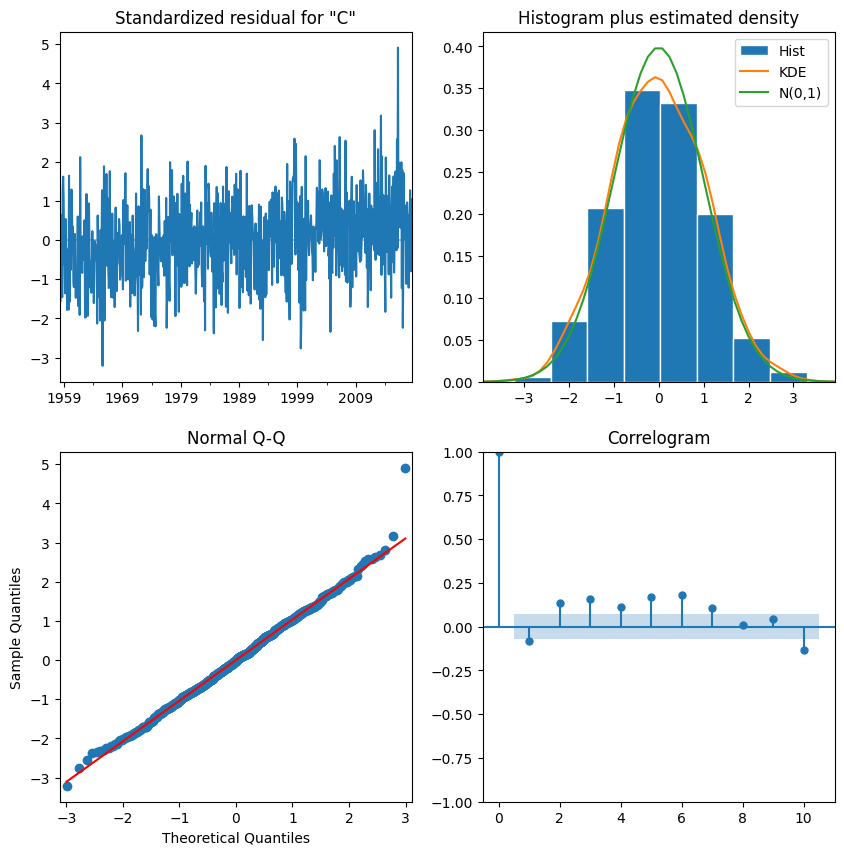

                               SARIMAX Results                                
Dep. Variable:                CO2_ppm   No. Observations:                  727
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -435.421
Date:                Sat, 09 Sep 2023   AIC                            890.841
Time:                        11:40:59   BIC                            936.717
Sample:                    03-01-1958   HQIC                           908.545
                         - 09-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0339      0.002     20.341      0.000       0.031       0.037
ar.L1          2.6604      0.025    107.338      0.000       2.612       2.709
ar.L2         -3.5070      0.055    -63.975      0.0

In [13]:

# Create and fit model
model = sm.tsa.statespace.SARIMAX(co2, order=(4,1,4), trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(10,10))
plt.show()

# Print summary
print(results.summary())

From the plots, we can make a decision that the model is doing well on the data, and no need to do another iteration.


# 2. Seasonal ARIMA Models

In the final section, we will discuss how to use seasonal ARIMA models to fit more complex data. You’ll learn how to decompose this data into seasonal and non-seasonal parts and then you’ll get the chance to utilize all your ARIMA tools on one last global forecast challenge.

# 2.1. Introduction to seasonal time series

A seasonal time series has predictable patterns that repeat regularly. Although we call this feature seasonality, it can repeat after any length of time. These seasonal cycles might repeat every year like sales of suncream, every week like the number of visitors to a park, or every day like the number of users on a website at any hour.

Any time series can be thought of to be made of three main components: trend, seasonal component, and the residual. The figure below shows the three components of the candy production time series used before.



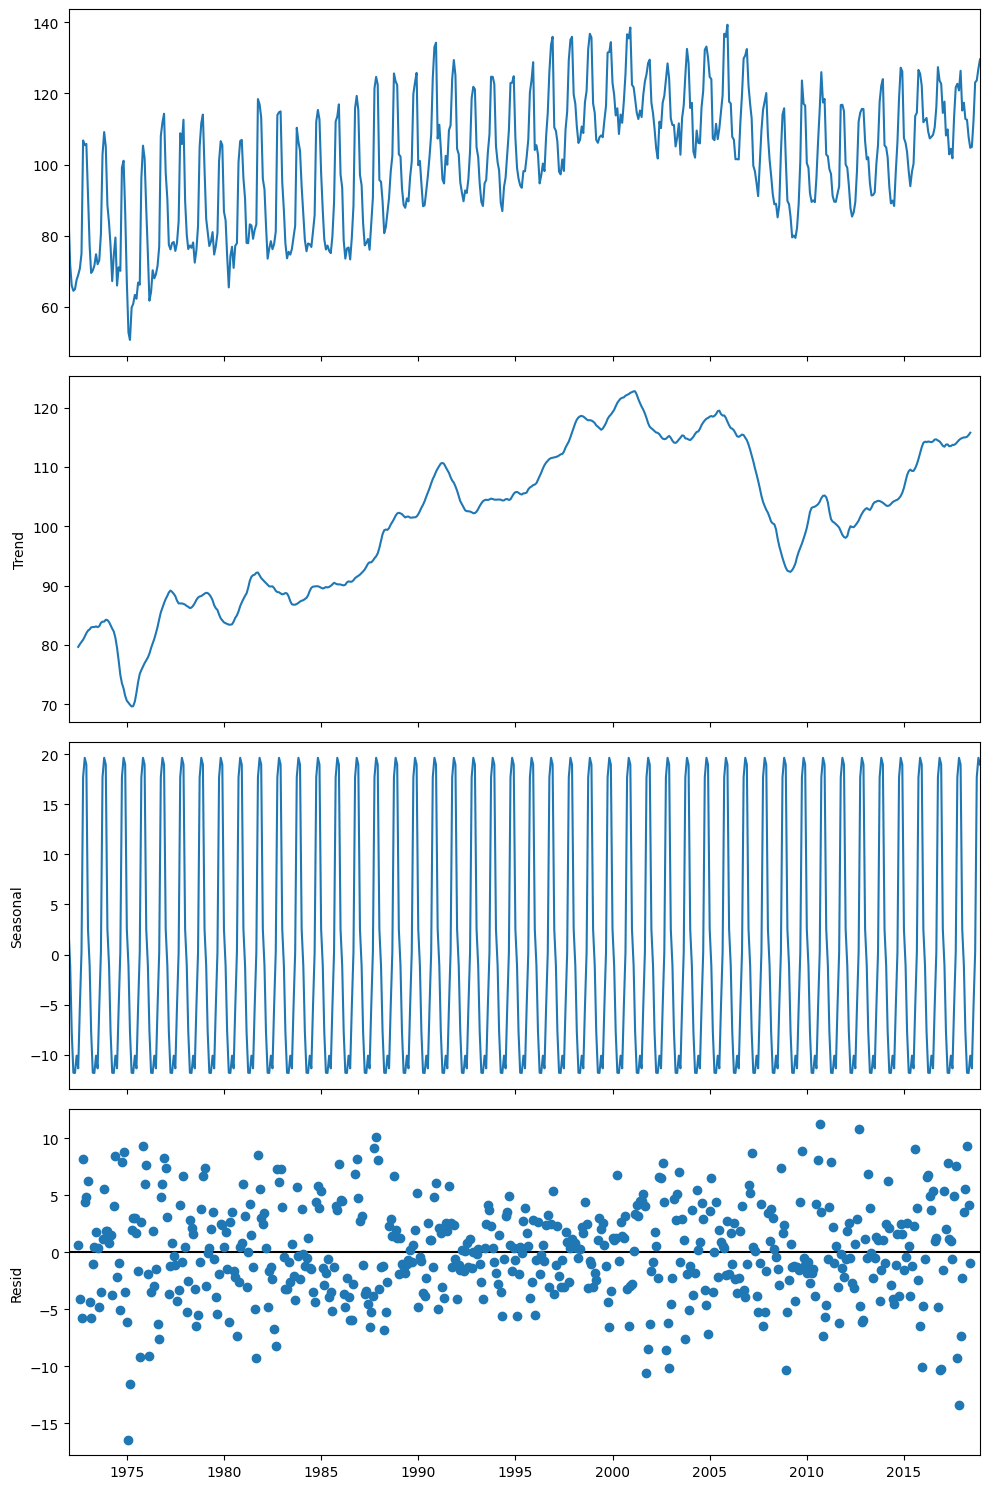

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

candy = pd.read_csv('/kaggle/input/candy-production/candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Decompose data
decomp_results = seasonal_decompose(candy, period=12)

# Plot decomposed data
plt.rcParams["figure.figsize"] = (10,15)
decomp_results.plot()
plt.show()

From the figure above it is obvious that there is a seasonality in the data. The cycle here is 12 months. However, this was given as a parameter to the function. If we would like to find the cycle or the seasonality cycle, one method is to use the ACF and observe the lag after which the correlation pattern gets repeated. However, it is important to make sure that the data is stationary. Since the candy production data is not stationary as it contains trends, we can transform it into stationary by taking the first difference. However, this time we are only trying to find the period of the time series, and the ACF plot will be clearer if we just subtract the rolling mean. We calculate the rolling mean using the DataFrame’s .rolling method where we pass the window size and also use the .mean method. Any large window size, N, will work for this. We subtract this from the original time series and drop the NA values. The time series is now stationary and it will be easier to interpret the ACF plot.


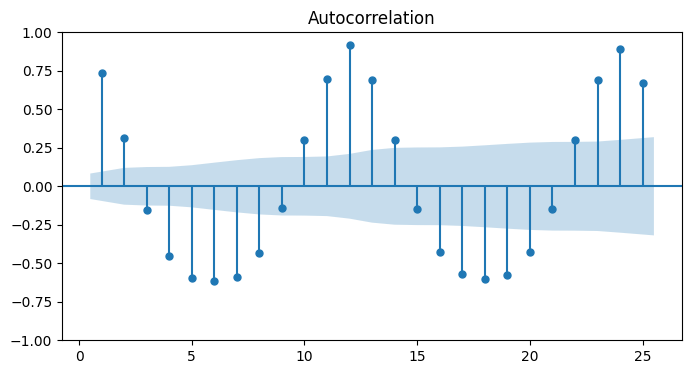

In [15]:
# Subtract long rolling average over 5 steps
candy = candy - candy.rolling(5).mean()
# Drop NaN values
candy = candy.dropna()

# Identifying seasonal data using ACF

# Create figure
fig, ax = plt.subplots(1,1, figsize=(8,4))
# Plot ACF
plot_acf(candy.dropna(), ax=ax, lags=25, zero=False)
plt.show()


After plotting the ACF of the detrended data, we can clearly see that there is a seasonal period of 12 steps. Since the data is seasonal we will always have correlated residuals left if we try to fit an ARIMA model to it. This means that we aren’t using all of the information in the data, and so we aren’t making the best predictions possible. This will be solved by using the seasonal Arima as will be shown in the next subsection.

# 2.2. Seasonal ARIMA model

In the previous subsection, we discussed how to find seasonality in the data, in this subsection we will know how to use the seasonality to make more accurate predictions. The seasonal ARIMA (SARIMA) is used for this. Fitting a SARIMA model is like fitting two different ARIMA models at once, one to the seasonal part and another to the non-seasonal part. Since we have these two models we will have two sets of orders. We have non-seasonal orders for the autoregressive (p), the difference (d), and moving average (q) parts. We also have this set of orders for the non-seasonal part added to them a new order, S, which is the length of the seasonal cycle.

Let’s compare the SARIMA and ARIMA models further. Below is the equation of the ARIMA model with parameters (2,0,1). In this equation, we regress the time series against itself at lags-1 and 2 and against the shock at lag-1.

ARIMA(2,0,1) model :

y(t) = a(1) y(t-1) + a(2) y(t-2) + m(1) ϵ(t-1) + ϵ(t)

Below is the equation for a simple SARIMA model with a season length of 7 days. This SARIMA model only has a seasonal part; we have set the non-seasonal orders to zero. We regress the time series against itself at lags of one season and two seasons and against the shock at a lag of one season.

SARIMA(0,0,0)(2,0,1)7 model:

y = a (7)y(t-7) + a(14)y(t-14) + m(7) ϵ(t-7) + ϵ(t)

This particular SARIMA model will be able to capture seasonal, weekly patterns, but won’t be able to capture local, day-to-day patterns. If we construct a SARIMA model and include non-seasonal orders as well, then we can capture both of these patterns.

Fitting a SARIMA model is almost the same as fitting an ARIMA model. We import the model object and fit it as before. The only difference is that we have to specify the seasonal order as well as the regular order when we instantiate the model.

> import statsmodels.api as sm

> model = sm(df, order=(p,d,q), seasonal_order=(P,D,Q,S))


This means that there are a lot of model orders we need to find. In the last subsection, we learned how to find the seasonal period, S, using the ACF. The next task is to find the order of seasonal differencing.

To make a time series stationary we may need to apply seasonal differencing. In seasonal differencing, instead of subtracting the most recent time series value, we subtract the time series value from one cycle ago. We can take the seasonal difference by using the df.diff method. This time we pass in an integer S, the length of the seasonal cycle.

If the time series shows a trend then we take the normal difference. Once we have found the two orders of differencing and made the time series stationary, we need to find the other model orders. To find the non-seasonal orders (p,q), we plot the ACF and the PACF of the differenced time series. To find the seasonal orders (P, Q) we plot the ACF and PACF of the differenced time series at multiple seasonal steps. Then we can use the same table of ACF and PACF rules to work out the seasonal order. We make these seasonal ACF and PACF plots using the plot_acf and plot_pacf functions, but this time we set the lags parameter to a list of lags instead of a maximum. This plots the ACF and PACF at these specific lags only.

Let’s apply this to the candy production time series used in the previous subsection. We know that the seasonal period of the data is 12 steps. So first we will take the seasonal difference to remove the seasonal effect and then one step difference to remove the trend effect.

<Axes: xlabel='date'>

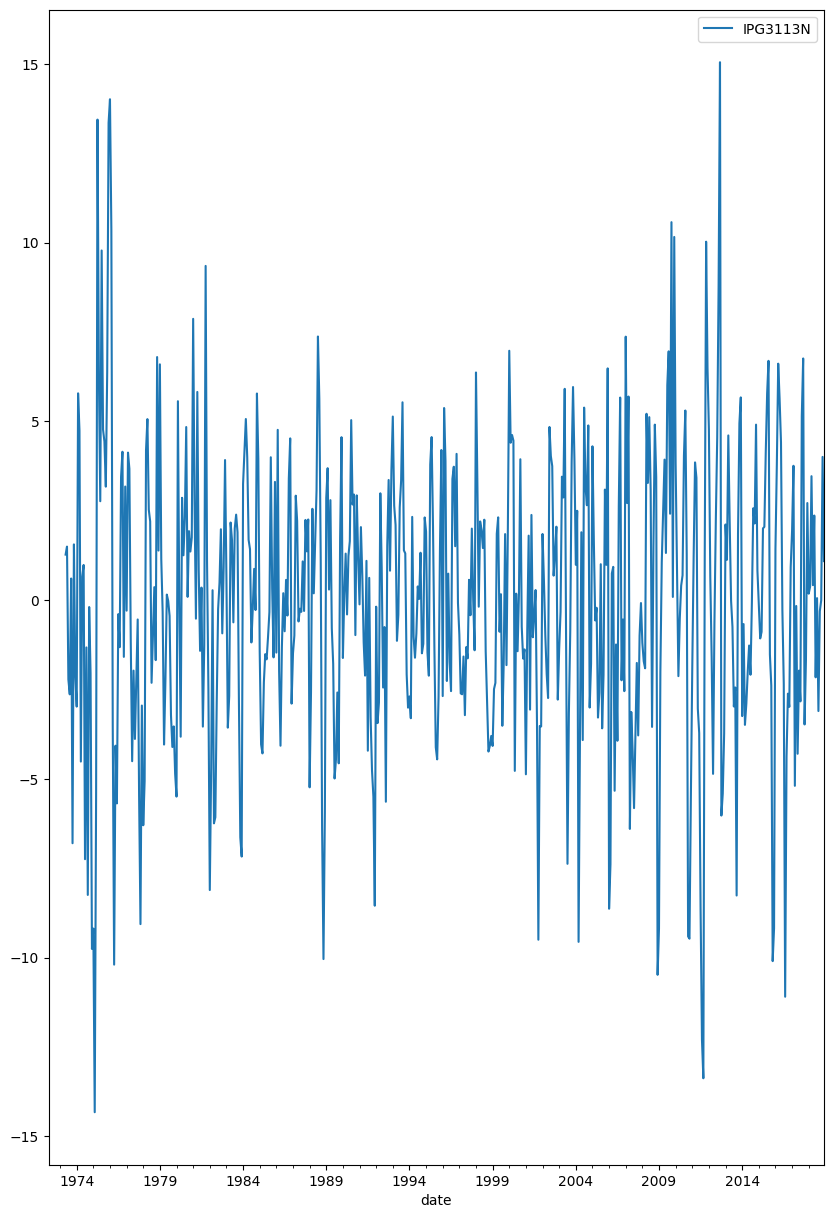

In [16]:
# Seasonal differencing
S = 12
candy_diff = candy.diff(S)
candy_diff.plot()


<Axes: xlabel='date'>

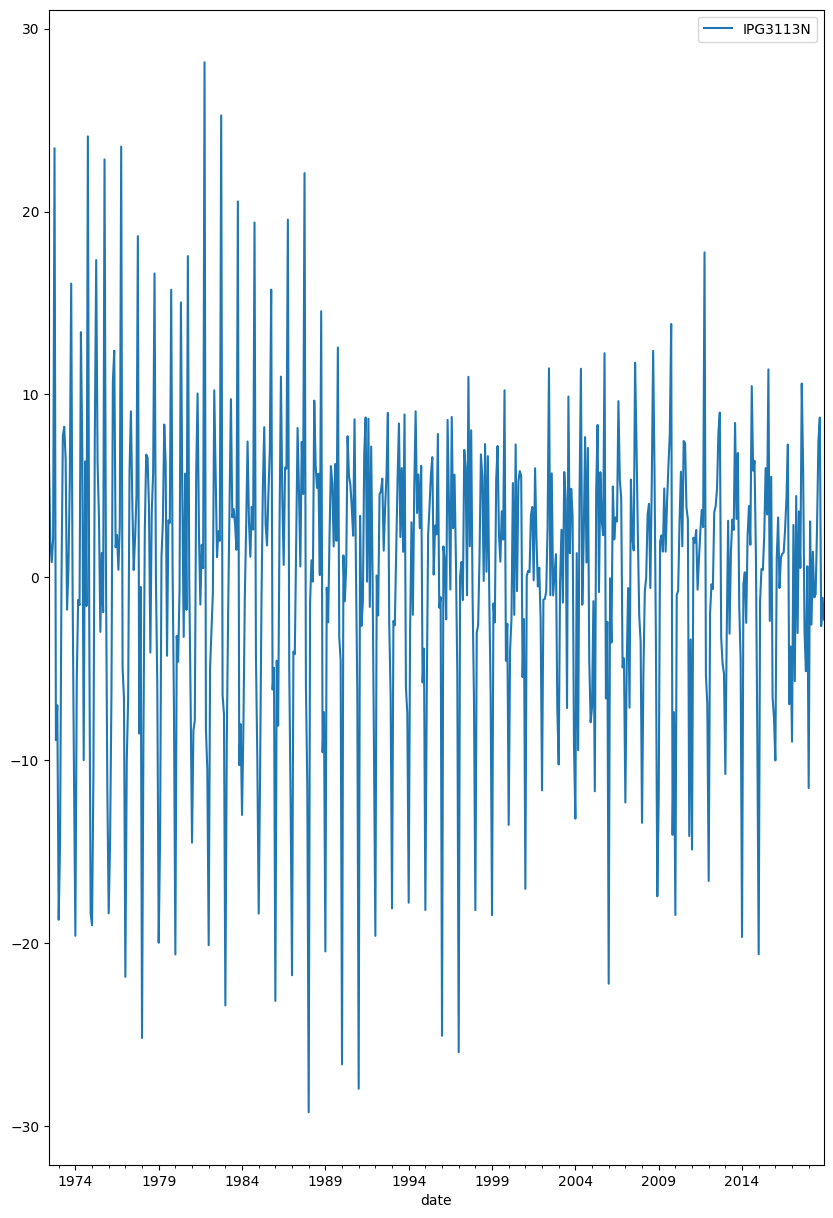

In [17]:

# one step differencing
candy_diff = candy.diff()
candy_diff = candy_diff.dropna()
candy_diff.plot()


Applying the augment Adfuller-Dickey test to make sure that the time series is now stationary.


In [18]:
# Run Dicky-Fuller test
result = adfuller(candy_diff)

# Print test statistic
print('The test stastics:', result[0])

# Print p-value
print("The p-value:",result[1])


The test stastics: -12.534999311054115
The p-value: 2.3824843186264014e-23


The p-value is less than 0.05 so we can reject the null hypothesis and assume that the time series now is stationary. After that, we will plot the ACF and PACF to find the non-seasonal model parameters.

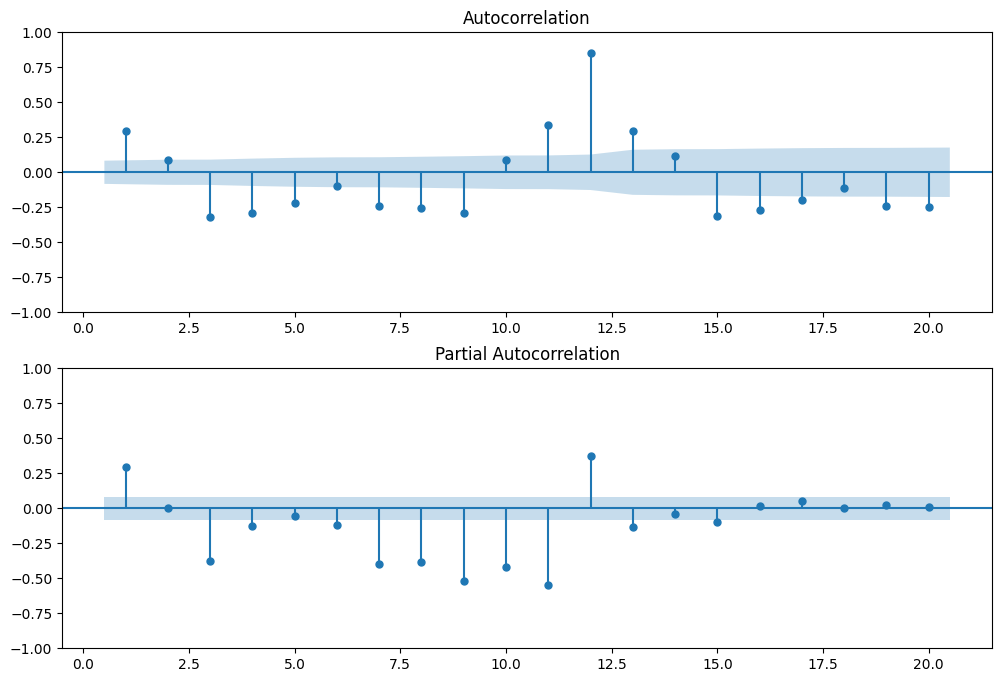

In [19]:
# find the non-seasonal model prameters 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(candy_diff, lags=20, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(candy_diff, lags=20, zero=False, ax=ax2)

plt.show()

There is no clear pattern in the ACF and PACF plots, so we will use the AIC and BIC to narrow down our choices.

In [20]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-4
for p in range(5):
    # Loop over q values from 0-4
    for q in range(5):
      
        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(candy_diff, order=(p, 1, q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))            
        except:
            print(p, q, None, None)
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Models sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Models sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71490D+00    |proj g|=  1.78944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   3.156D-06   3.715D+00
  F =   3.7149031384444280     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.6

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64726D+00    |proj g|=  2.40397D-01

At iterate    5    f=  3.53405D+00    |proj g|=  1.55355D-02

At iterate   10    f=  3.51493D+00    |proj g|=  8.80391D-03

At iterate   15    f=  3.51192D+00    |proj g|=  7.28538D-04

At iterate   20    f=  3.51172D+00    |proj g|=  1.02667D-03

At iterate   25    f=  3.51171D+00    |proj g|=  4.19037D-05

At iterate   30    f=  3.51171D+00    |proj g|=  1.04006D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52220D+00    |proj g|=  7.75916D-02

At iterate    5    f=  3.48196D+00    |proj g|=  4.50187D-02

At iterate   10    f=  3.46929D+00    |proj g|=  6.19423D-03

At iterate   15    f=  3.46811D+00    |proj g|=  1.61742D-03

At iterate   20    f=  3.46802D+00    |proj g|=  3.74268D-04

At iterate   25    f=  3.46801D+00    |proj g|=  1.99323D-04

At iterate   30    f=  3.46800D+00    |proj g|=  5.30349D-05

At iterate   35    f=  3.46800D+00    |proj g|=  2.32229D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79514D+00    |proj g|=  5.91263D-01

At iterate    5    f=  3.51464D+00    |proj g|=  5.78340D-02

At iterate   10    f=  3.47548D+00    |proj g|=  1.03122D-02

At iterate   15    f=  3.46570D+00    |proj g|=  3.06151D-03

At iterate   20    f=  3.46527D+00    |proj g|=  2.13565D-03

At iterate   25    f=  3.46513D+00    |proj g|=  1.13006D-03

At iterate   30    f=  3.46510D+00    |proj g|=  4.43988D-04

At iterate   35    f=  3.46510D+00    |proj g|=  2.02021D-04

At iterate   40    f=  3.46510D+00    |proj g|=  2.16503D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64865D+00    |proj g|=  4.85805D-04

At iterate    5    f=  3.64865D+00    |proj g|=  2.87173D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   1.074D-06   3.649D+00
  F =   3.6486532654631052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64852D+00    |proj g|=  2.67308D-01

At iterate    5    f=  3.55159D+00    |proj g|=  2.85544D-02

At iterate   10    f=  3.51002D+00    |proj g|=  3.32943D-02

At iterate   15    f=  3.50454D+00    |proj g|=  4.16610D-03

At iterate   20    f=  3.50306D+00    |proj g|=  9.88220D-03

At iterate   25    f=  3.50294D+00    |proj g|=  2.70602D-04

At iterate   30    f=  3.50293D+00    |proj g|=  6.94345D-05

At iterate   35    f=  3.50293D+00    |proj g|=  1.75537D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.48657D+00    |proj g|=  2.25597D-02

At iterate   10    f=  3.47744D+00    |proj g|=  1.02915D-02

At iterate   15    f=  3.47234D+00    |proj g|=  5.14497D-03

At iterate   20    f=  3.46743D+00    |proj g|=  4.00353D-03

At iterate   25    f=  3.46707D+00    |proj g|=  1.19246D-04

At iterate   30    f=  3.46703D+00    |proj g|=  2.08244D-04

At iterate   35    f=  3.46702D+00    |proj g|=  1.00991D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     45      1     0     0   1.010D-05   3.467D+00
  F =   3.4670244322338433     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.50001D+00    |proj g|=  9.42802D-02

At iterate   10    f=  3.47073D+00    |proj g|=  1.54198D-02

At iterate   15    f=  3.44437D+00    |proj g|=  5.11475D-02

At iterate   20    f=  3.43166D+00    |proj g|=  1.77631D-02

At iterate   25    f=  3.42441D+00    |proj g|=  9.35317D-03

At iterate   30    f=  3.42261D+00    |proj g|=  1.47900D-03

At iterate   35    f=  3.42237D+00    |proj g|=  2.33076D-03

At iterate   40    f=  3.42236D+00    |proj g|=  4.06731D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     43      1     0     0   7.796D-06   3.422D+00
  F =   3.42236356250

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usi

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64853D+00    |proj g|=  6.74558D-04

At iterate    5    f=  3.64853D+00    |proj g|=  5.04801D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   6.048D-06   3.649D+00
  F =   3.6485313889689319     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.50269D+00    |proj g|=  2.03381D-02

At iterate   10    f=  3.45271D+00    |proj g|=  1.16566D-02

At iterate   15    f=  3.44149D+00    |proj g|=  3.20302D-02

At iterate   20    f=  3.43456D+00    |proj g|=  4.06797D-03

At iterate   25    f=  3.43355D+00    |proj g|=  9.21357D-04

At iterate   30    f=  3.43353D+00    |proj g|=  1.99942D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     34      1     0     0   1.999D-06   3.434D+00
  F =   3.4335258105033284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51739D+00    |proj g|=  8.61123D-02

At iterate    5    f=  3.45325D+00    |proj g|=  4.04610D-02

At iterate   10    f=  3.44344D+00    |proj g|=  1.95752D-02

At iterate   15    f=  3.44004D+00    |proj g|=  1.26514D-02

At iterate   20    f=  3.43847D+00    |proj g|=  2.14331D-02

At iterate   25    f=  3.43797D+00    |proj g|=  1.06536D-02

At iterate   30    f=  3.43788D+00    |proj g|=  4.59190D-03

At iterate   35    f=  3.43786D+00    |proj g|=  6.87491D-04

At iterate   40    f=  3.43785D+00    |proj g|=  5.47748D-04

At iterate   45    f=  3.43785D+00    |proj g|=  1.65129D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70479D+00    |proj g|=  4.64698D-01

At iterate    5    f=  3.47416D+00    |proj g|=  5.53922D-02

At iterate   10    f=  3.44465D+00    |proj g|=  5.46243D-02

At iterate   15    f=  3.44080D+00    |proj g|=  2.03197D-02

At iterate   20    f=  3.43893D+00    |proj g|=  5.60441D-03

At iterate   25    f=  3.43858D+00    |proj g|=  1.97903D-03

At iterate   30    f=  3.43810D+00    |proj g|=  2.79844D-03

At iterate   35    f=  3.43762D+00    |proj g|=  5.45220D-03

At iterate   40    f=  3.43753D+00    |proj g|=  6.11606D-03

At iterate   45    f=  3.43747D+00    |proj g|=  1.51465D-03

At iterate   50    f=  3.43746D+00    |proj g|=  5.03310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.60690D+00    |proj g|=  7.77672D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   1.234D-05   3.607D+00
  F =   3.6068988810817988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59325D+00    |proj g|=  9.22134D-02

At iterate    5    f=  3.54002D+00    |proj g|=  1.55962D-01

At iterate   10    f=  3.44146D+00    |proj g|=  7.36528D-02


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.43307D+00    |proj g|=  2.09631D-02

At iterate   20    f=  3.42898D+00    |proj g|=  9.76306D-03

At iterate   25    f=  3.42862D+00    |proj g|=  2.77156D-04

At iterate   30    f=  3.42859D+00    |proj g|=  3.38478D-04

At iterate   35    f=  3.42859D+00    |proj g|=  2.78886D-04

At iterate   40    f=  3.42859D+00    |proj g|=  1.17464D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     51      1     0     0   5.026D-05   3.429D+00
  F =   3.4285855564438825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.47271D+00    |proj g|=  1.89847D-02

At iterate   10    f=  3.45062D+00    |proj g|=  3.92645D-02

At iterate   15    f=  3.43683D+00    |proj g|=  3.73318D-02

At iterate   20    f=  3.35907D+00    |proj g|=  7.58415D-02

At iterate   25    f=  3.27902D+00    |proj g|=  1.47995D-02

At iterate   30    f=  3.27177D+00    |proj g|=  1.17062D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     57      1     0     0   1.062D-03   3.271D+00
  F =   3.2714760659691127     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.45731D+00    |proj g|=  2.98703D-02

At iterate   10    f=  3.44305D+00    |proj g|=  1.51812D-02

At iterate   15    f=  3.43927D+00    |proj g|=  1.10971D-02

At iterate   20    f=  3.43902D+00    |proj g|=  6.24200D-03

At iterate   25    f=  3.43810D+00    |proj g|=  1.54467D-02

At iterate   30    f=  3.43787D+00    |proj g|=  9.06349D-03

At iterate   35    f=  3.43773D+00    |proj g|=  2.65175D-03

At iterate   40    f=  3.43771D+00    |proj g|=  9.68644D-04

At iterate   45    f=  3.43770D+00    |proj g|=  7.24486D-04

At iterate   50    f=  3.43770D+00    |proj g|=  6.03729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68886D+00    |proj g|=  3.94029D-01


 This problem is unconstrained.



At iterate    5    f=  3.44686D+00    |proj g|=  8.16197D-02

At iterate   10    f=  3.43284D+00    |proj g|=  4.06280D-02

At iterate   15    f=  3.42299D+00    |proj g|=  3.51393D-02

At iterate   20    f=  3.41248D+00    |proj g|=  2.26839D-02

At iterate   25    f=  3.40703D+00    |proj g|=  4.54521D-02

At iterate   30    f=  3.39787D+00    |proj g|=  7.09061D-03

At iterate   35    f=  3.39742D+00    |proj g|=  5.16433D-03

At iterate   40    f=  3.39607D+00    |proj g|=  3.39252D-02

At iterate   45    f=  3.39530D+00    |proj g|=  2.79125D-02

At iterate   50    f=  3.39509D+00    |proj g|=  9.31050D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.56488D+00    |proj g|=  3.99006D-04

At iterate   10    f=  3.56488D+00    |proj g|=  7.91602D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     13      1     0     0   7.916D-06   3.565D+00
  F =   3.5648786411175628     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55781D+00    |proj g|=  5.64896D-02

At iterate    5    f=  3.53559D+00    |proj g|=  1.51805D-01

At iterate   10    f=  3.44198D+00    |proj g|=  4.09469D-02

At iterate   15    f=  3.42524D+00    |proj g|=  6.04197D-03

At iterate   20    f=  3.42134D+00    |proj g|=  1.93610D-03

At iterate   25    f=  3.42078D+00    |proj g|=  1.17448D-03

At iterate   30    f=  3.42073D+00    |proj g|=  1.40253D-03

At iterate   35    f=  3.42072D+00    |proj g|=  2.59019D-04

At iterate   40    f=  3.42072D+00    |proj g|=  7.36375D-05

At iterate   45    f=  3.42072D+00    |proj g|=  3.21627D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55297D+00    |proj g|=  1.07017D-01

At iterate    5    f=  3.46073D+00    |proj g|=  4.41146D-02

At iterate   10    f=  3.42742D+00    |proj g|=  7.81164D-02

At iterate   15    f=  3.40651D+00    |proj g|=  3.66206D-02

At iterate   20    f=  3.39508D+00    |proj g|=  8.02352D-03

At iterate   25    f=  3.38957D+00    |proj g|=  4.32982D-03

At iterate   30    f=  3.38815D+00    |proj g|=  1.94690D-03

At iterate   35    f=  3.38805D+00    |proj g|=  4.65880D-04

At iterate   40    f=  3.38804D+00    |proj g|=  1.04618D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54578D+00    |proj g|=  8.45544D-02

At iterate    5    f=  3.46901D+00    |proj g|=  3.76475D-02

At iterate   10    f=  3.43353D+00    |proj g|=  1.17525D-02

At iterate   15    f=  3.43273D+00    |proj g|=  9.09439D-03

At iterate   20    f=  3.38472D+00    |proj g|=  1.79771D-01

At iterate   25    f=  3.33327D+00    |proj g|=  8.54430D-02

At iterate   30    f=  3.30066D+00    |proj g|=  2.86385D-02

At iterate   35    f=  3.22929D+00    |proj g|=  1.91713D-02

At iterate   40    f=  3.22134D+00    |proj g|=  6.30655D-03

At iterate   45    f=  3.22096D+00    |proj g|=  3.87102D-03

At iterate   50    f=  3.22017D+00    |proj g|=  1.27953D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78601D+00    |proj g|=  6.23142D-01


 This problem is unconstrained.



At iterate    5    f=  3.46374D+00    |proj g|=  7.70406D-02

At iterate   10    f=  3.43584D+00    |proj g|=  1.88659D-02

At iterate   15    f=  3.42788D+00    |proj g|=  3.82007D-02

At iterate   20    f=  3.42497D+00    |proj g|=  8.66275D-02

At iterate   25    f=  3.41906D+00    |proj g|=  4.07006D-01

At iterate   30    f=  3.41328D+00    |proj g|=  1.70983D-01

At iterate   35    f=  3.41280D+00    |proj g|=  9.88100D-03

At iterate   40    f=  3.41169D+00    |proj g|=  2.83666D-01

At iterate   45    f=  3.41037D+00    |proj g|=  1.03625D-02

At iterate   50    f=  3.41021D+00    |proj g|=  3.98843D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The best model parameters are (0,3). After that, we will plot the seasonal ACF and PACF to find the seasonal parameters.

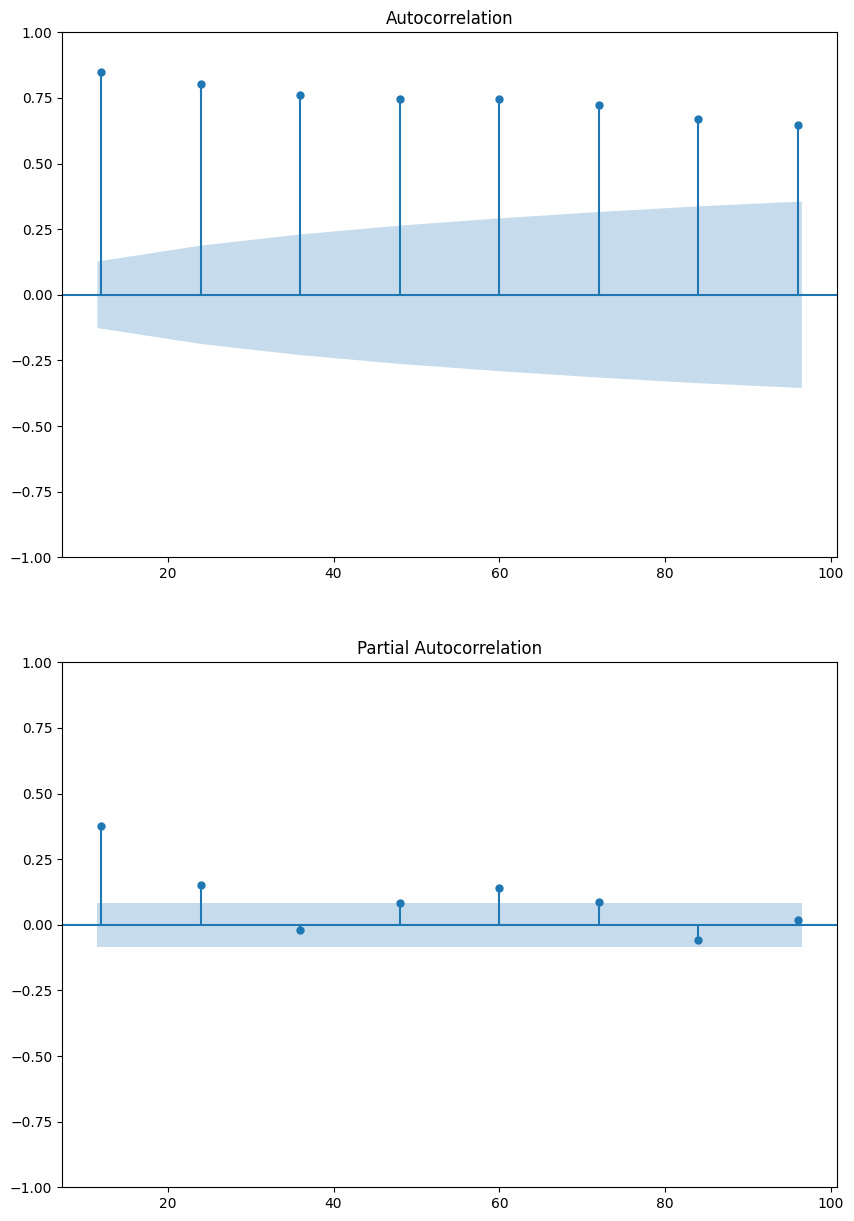

In [21]:

# Plotting seasonal ACF and PACF

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)

# Plot seasonal ACF
plot_acf(candy_diff, lags=[12,24,36,48,60,72, 84, 96 ], ax=ax1)

# Plot seasonal PACF
plot_pacf(candy_diff, lags=[12,24,36,48,60,72, 84, 96], ax=ax2)
plt.show()

The ACF is tailing off and the PACF is cut off after a lag of three. So the model parameter is (0,3). The final step is to fit the model with all of these parameters.


In [22]:
# Fitting a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate model
S = 12
D = 1
d = 1
P = 0
Q = 3
p = 4
q = 3
model = SARIMAX(candy, order=(p,d,q), seasonal_order=(P,D,Q,S))

# Fit model
results = model.fit()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66906D+00    |proj g|=  2.19496D-01


 This problem is unconstrained.



At iterate    5    f=  2.50861D+00    |proj g|=  5.78110D-02

At iterate   10    f=  2.47301D+00    |proj g|=  2.81509D-02

At iterate   15    f=  2.46427D+00    |proj g|=  2.90355D-02

At iterate   20    f=  2.46207D+00    |proj g|=  1.11351D-02

At iterate   25    f=  2.46126D+00    |proj g|=  4.39836D-02

At iterate   30    f=  2.46080D+00    |proj g|=  1.36324D-02

At iterate   35    f=  2.46063D+00    |proj g|=  3.78981D-02

At iterate   40    f=  2.46054D+00    |proj g|=  4.54969D-03

At iterate   45    f=  2.46053D+00    |proj g|=  4.11237D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     49     54   

# 2.3. Process automation and model saving

Previously we searched over ARIMA model order using for loops. Now that we have seasonal orders as well, this is very complex. Fortunately, there is a package that will do most of this work for us. This is the pmdarima package The auto_arima function from this package loops over model orders to find the best one. The object returned by the function is the results object of the best model found by the search. This object is almost exactly like a statsmodels SARIMAX results object and has the summary and the plot-diagnostics method.

In [23]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.5 MB/s eta 0:00:00


 ARIMA(5,0,4)(0,0,0)[0] intercept
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  560
Model:               SARIMAX(5, 0, 4)   Log Likelihood               -1556.085
Date:                Sat, 09 Sep 2023   AIC                           3134.170
Time:                        11:43:27   BIC                           3181.777
Sample:                    05-01-1972   HQIC                          3152.759
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0588      0.049      1.204      0.228      -0.037       0.155
ar.L1          2.7356      0.047     57.720      0.000       2.643       2.829
ar.L2         -3.7

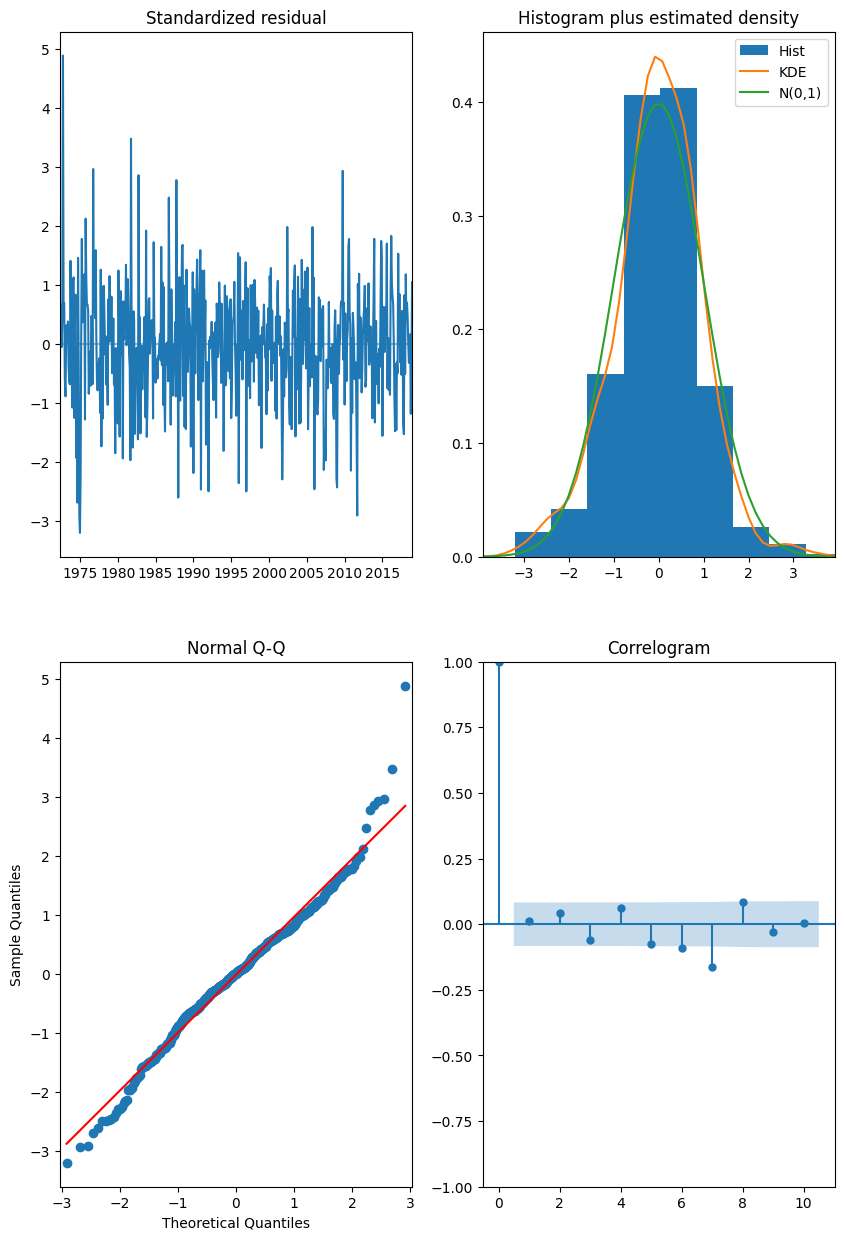

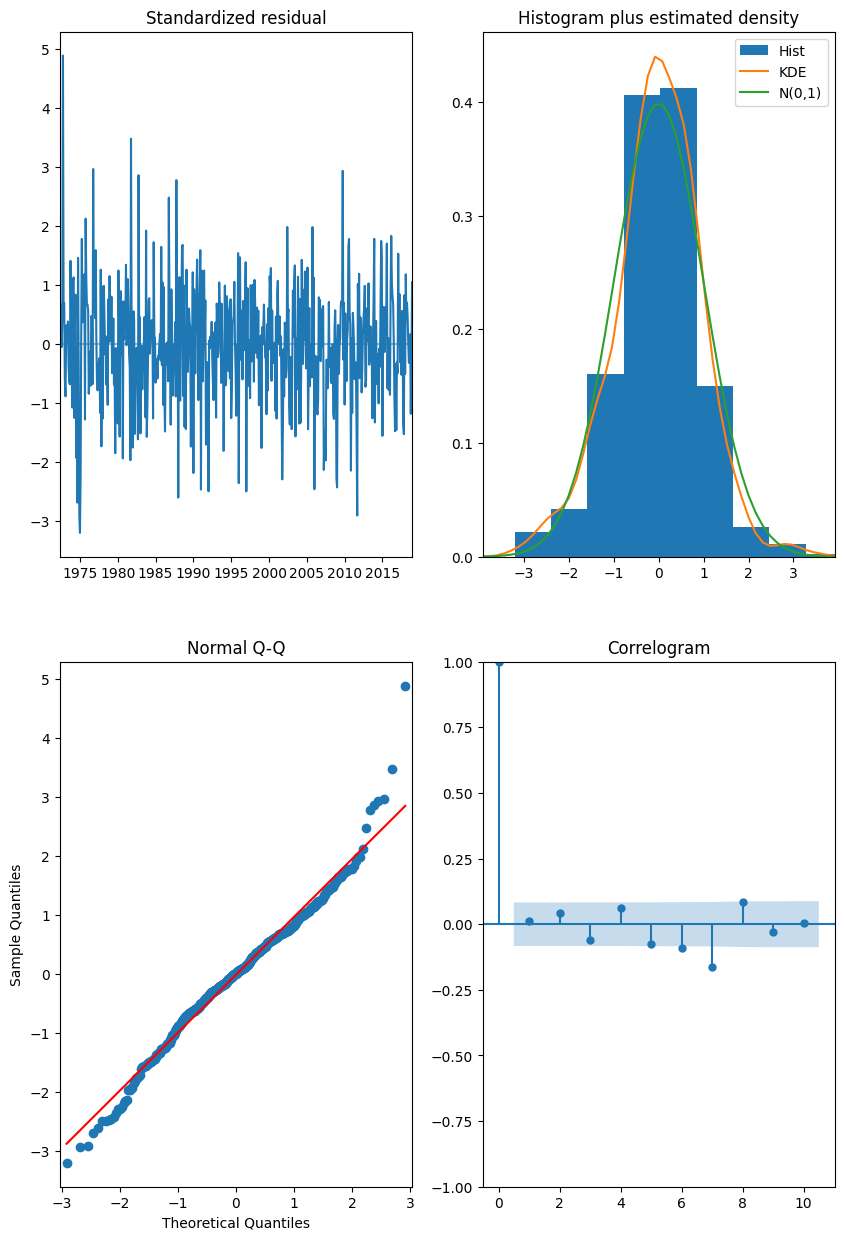

In [24]:
# Searching over model orders
import pmdarima as pm

results = pm.auto_arima(candy)
print(results)
print(results.summary())
results.plot_diagnostics()


The order of the best model found by the search is (2,3). However, it did not take the seasonal components into consideration. To do this we have to set the seasonal parameter to true. We also need to specify the length of the seasonal period; and the order of seasonal differencing. Finally, we will use a few non-order parameters. Using information_criterion you can select whether to choose the best model based on AIC or BIC, if information_criterion =’aic’ it will select it based on AIC and if it is information_criterion= ‘bic’ it will select it based on BIC. Also, we will set the trace parameter to true then this function prints the AIC and BIC for each model it fits. To ignore bad models we will set the error_action= ‘ignore’. We will set the stepwise to true then instead of searching over all of the model orders, the function searches outwards from the initial model order guess using an intelligent search method. This might save running time and computation power.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=2794.720, Time=7.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3098.803, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2897.546, Time=1.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2816.796, Time=1.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3096.804, Time=0.10 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=2799.904, Time=5.68 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=2889.489, Time=3.79 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=2795.048, Time=13.41 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=2795.872, Time=18.48 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=2970.545, Time=0.65 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=2793.993, Time=12.58 sec
 ARIMA(2,0,2)(0,1,3)[12] intercept   : AIC=2795.721, Time=22.87 sec
 ARIMA(2,0,2)(1,1,3)[12] intercept   : AIC=2797.776, Time=33.74 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=2809.943, Time=6.84 sec
 ARIMA(2,0,1)(

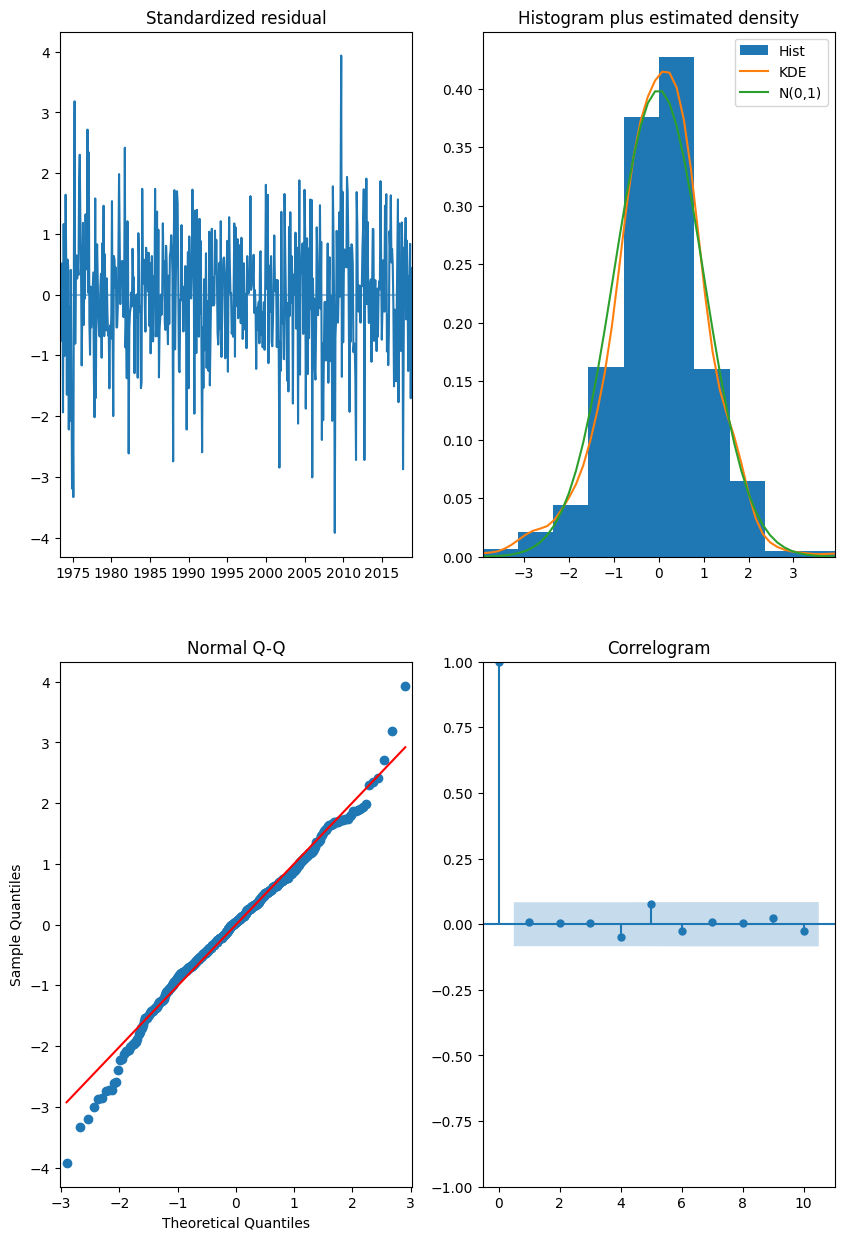

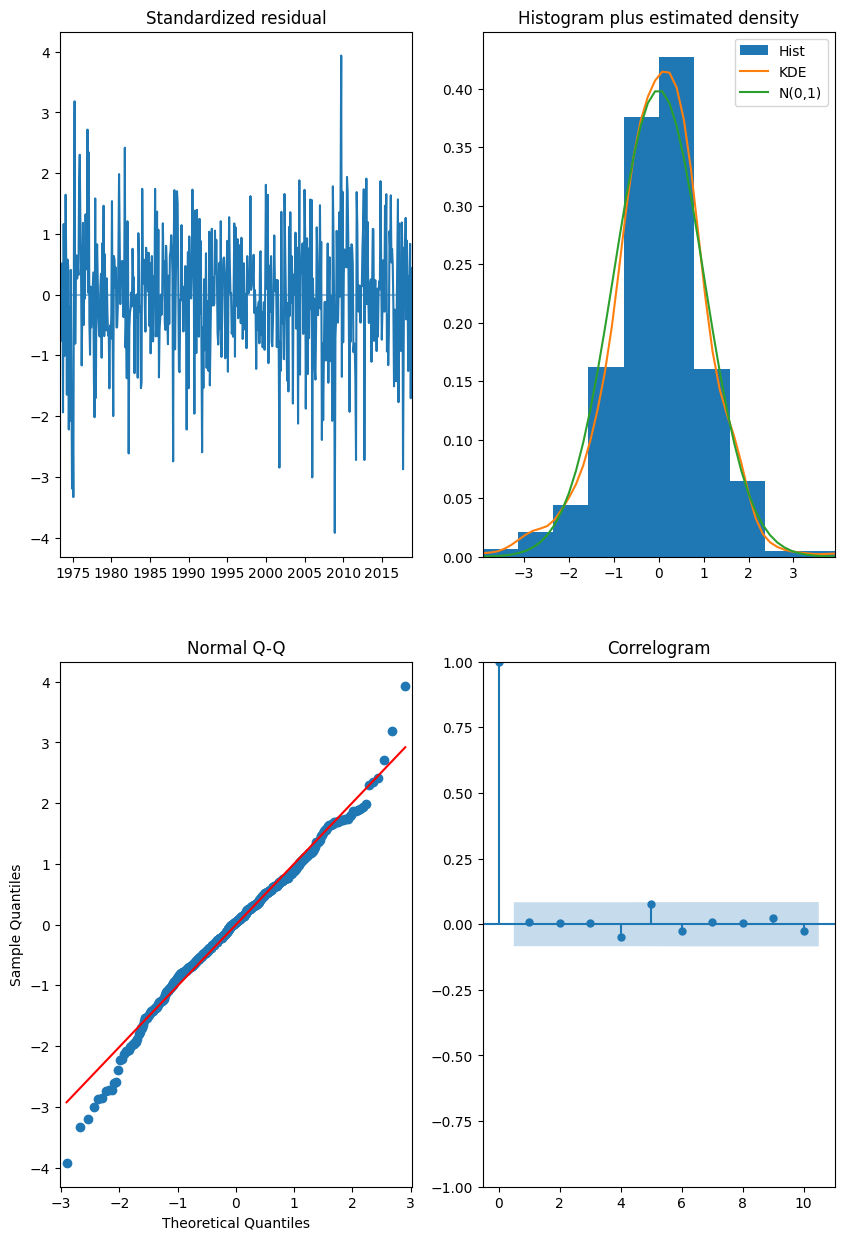

In [25]:
# Seasonal search parameters

results = pm.auto_arima(candy, # data
                        seasonal=True, # is the time series seasonal
                        m=12, # the seasonal period
                        D=1, # seasonal difference order
                        start_P=1, # initial guess for P
                        start_Q=1, # initial guess for Q
                        max_P=4, # max value of P to test
                        max_Q=4, # max value of Q to test
                        information_criterion='aic', # used to select best model
                        trace=True, # print results whilst training
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True,
                       )
print(results)
print(results.summary())
results.plot_diagnostics()

Once you have fit a model in this way, you may want to save it and load it later. You can do this using the joblib package. To save the model we use the dump function from the joblib package. We pass the model results object and the file_path into this function. Later on, when we want to make new predictions we can load this model again. To do this we use the load function from joblib.

In [26]:
#Saving model objects
# Import joblib
import joblib
# Select a filepath
filepath = 'model.pkl'
# Save model to filepath
joblib.dump(results, filepath)

# Load the model 
# Select a filepath
filepath ='model.pkl'
# Load model object from filepath
loaded_model = joblib.load(filepath)


If you have new data and you would like to update the trained model, you can use the model.update(new_data). This isn’t the same as choosing the model order again and so if you are updating with a large amount of new data it may be best to go back to the start of the Box-Jenkins method.

# 2.4. SARIMA and Box-Jenkins for seasonal time series

We previously covered the Box-Jenkins method for ARIMA models. We go through the identification of the model order; estimating or fitting the model; diagnosing the model residuals, and finally production. For SARIMA models the only step in the method which will change is the identification step. At the identification step we add the tasks of determining whether a time series is seasonal, and if so, then finding its seasonal period. We also need to consider transforms to make the seasonal time series stationary, such as seasonal and non-seasonal differencing and other transforms. Sometimes we will have the choice of whether to apply seasonal differencing, non-seasonal differencing, or both to make a time series stationary. Some good rules of thumb are that you should never use more than one order of seasonal differencing, and never more than two orders of differencing in total. Sometimes you will be able to make a time series stationary by using either one seasonal difference or one non-seasonal difference.

There are two types of seasonality: weak seasonality and strong seasonality. In weak seasonality, the seasonal oscillations in the time series will not always look the same and will be harder to identify. While in the strong seasonality the seasonality pattern in the time series will be strong. When you have a strong seasonal pattern you should always use one order of seasonal differencing. This will ensure that the seasonal oscillation will remain in your dynamic predictions far into the future without fading out. While in a weak seasonal pattern use it if only necessary.

Just like in ARIMA modeling sometimes we need to use other transformations on our time series before fitting. If the seasonality is Additive seasonality in which the seasonal pattern just adds or takes away a little from the trend. Whenever the seasonality is additive we shouldn’t need to apply any transforms except differencing. If the seasonality is multiplicative the amplitude of the seasonal oscillations will get larger as the data trends up or smaller as it trends down. If the seasonality is multiplicative, the SARIMA model can’t fit this without extra transforms. To deal with this we take the log transform of the data before modeling it.

